In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

/home/sakil/anaconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

# Importing the dataset
dataset = pd.read_csv('titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
Missing Values

In [3]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

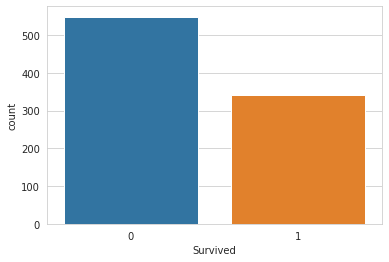

In [6]:
#using countplot of seaborn,we are checking how many survived or died
#0 denotes died,1 denotes survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=dataset)

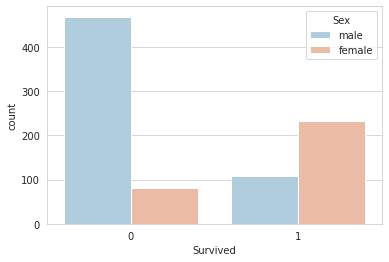

In [7]:
#plotting countplot on Survived ,and separating male and female on sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dataset,palette='RdBu_r')

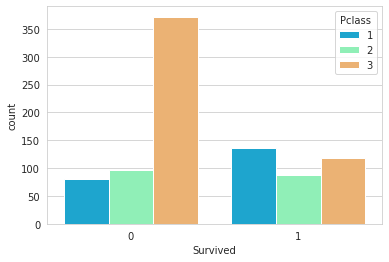

In [8]:
#plotting countplot on survived feature ,on Pclass features
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset,palette='rainbow')


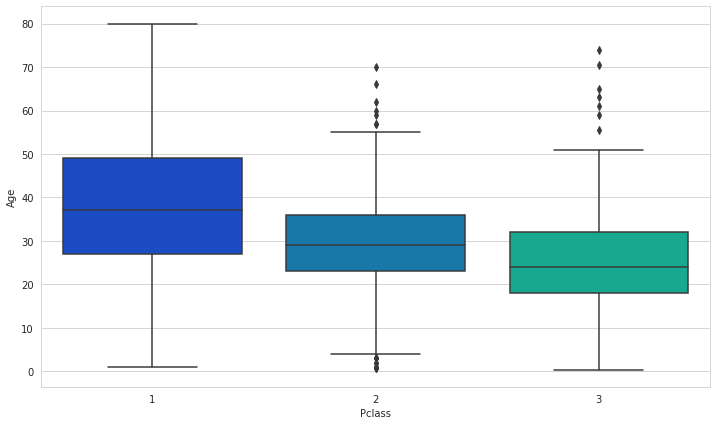

In [10]:
plt.figure(figsize=(12, 7))
#boxplot gives 25% percentile,50% percentile,75% percentile
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [11]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [13]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

In [14]:
dataset.drop('Cabin',axis=1,inplace=True)

In [16]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
dataset.dropna(inplace=True)

# Converting Categorical Features

In [20]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [22]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [23]:
#we dont require Sex,Embarked,Name,Ticket columns from the dataset so we are dropping those columns
#since Sex and Embarked are categorical features,so we are dropping these columns as we have already converted into 
#dummy variable
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
#we are concatenating sex and embark features with train data
dataset= pd.concat([dataset,sex,embark],axis=1)

In [25]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#we are splitting dataset into 70%train set and 30%test set
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1), 
                                                    dataset['Survived'], test_size=0.30, 
                                                    random_state=101)

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
#Dense is used for creating layers in deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/py

In [31]:
X_train.shape[1]

9

In [30]:
# Initialising the ANN
classifier = Sequential()

In [32]:
# Adding the input layer and the first hidden layer
#we are giving output_dim=6,input_dim=11 as we have 11 input features
#we are using init='he_uniform'initialization,we are using activation='relu',generally relu performs well
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=9, units=6, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.


In [33]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  


In [34]:
# Adding the output layer
#as output layer will be 1 so we are using output_dim=1
#In output layer case , we are using activation function=sigmoid
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.


In [35]:
# Compiling the ANN
#here we are uisng opimizer=Adamax,loss=binary_crossentropy as it is binary classification
#metrics=accuracy
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [36]:

# Fitting the ANN to the Training set
#we are making model
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until



Train on 416 samples, validate on 206 samples
Epoch 1/100
416/416 [==============================] - 1s 3ms/step - loss: 0.6374 - accuracy: 0.6346 - val_loss: 0.6242 - val_accuracy: 0.6699
Epoch 2/100
416/416 [==============================] - 0s 328us/step - loss: 0.6218 - accuracy: 0.6707 - val_loss: 0.6148 - val_accuracy: 0.6893
Epoch 3/100
416/416 [==============================] - 0s 325us/step - loss: 0.6099 - accuracy: 0.6755 - val_loss: 0.6062 - val_accuracy: 0.6990
Epoch 4/100
416/416 [==============================] - 0s 361us/step - loss: 0.5986 - accuracy: 0.6827 - val_loss: 0.5965 - val_accuracy: 0.6990
Epoch 5/100
416/416 [==============================] - 0s 526us/step - loss: 0.5873 - accuracy: 0.6803 - val_loss: 0.5869 - val_accuracy: 0.7039
Epoch 6/100
416/416 [==============================] - 0s 388us/step - loss: 0.5761 - accuracy: 0.6923 - val_loss: 0.5786 - val_accuracy: 0.7136
Epoch 7/100
416/416 [==============================] - 0s 370us/step - loss: 0.5657 -

In [37]:
# list all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


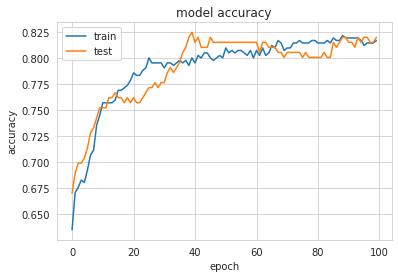

In [38]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

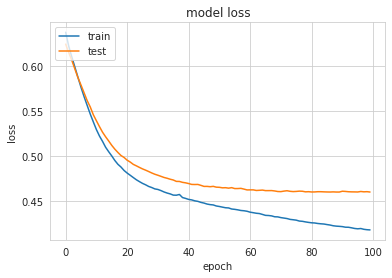

In [39]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [44]:
cm

array([[143,  20],
       [ 34,  70]])

In [42]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [43]:
score

0.797752808988764